In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

### Reading the lightning observation data for march 2017.

In [ ]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2017/mar2017.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,27585830,7,2017-03-02T00:02:05.563866496,16.14121,73.84296,3048,1,-2441,NaN,100,2017-03-02
1,27585831,7,2017-03-02T00:07:05.900261223,16.12103,73.83682,16753,1,-2430,NaN,100,2017-03-02
2,27585832,7,2017-03-02T00:08:05.968169689,16.14457,73.83312,18553,1,-2881,NaN,100,2017-03-02
3,27585833,7,2017-03-02T04:29:24.474762082,27.74201,75.90760,16005,1,21784,NaN,100,2017-03-02
4,27585834,7,2017-03-02T04:34:14.517434120,27.78474,75.93995,19230,1,8386,NaN,100,2017-03-02


### Pre-processing

In [ ]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df0=df0.loc[df0['date_time']>='2017-04-01 00:00:00']

In [ ]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
227096,15.79158,74.93580,-2480,2017-04-01 08:13:32
227097,15.90312,74.98187,-1177,2017-04-01 08:13:44
227098,16.03854,74.78399,3318,2017-04-01 08:13:50
227099,15.90373,74.92880,-3069,2017-04-01 08:14:07
227100,15.76052,74.84104,-1607,2017-04-01 08:14:15


### Reading lightning observation data for Apr and May 2017.

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2017/apr2017.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,27833775,8,2017-04-02T00:01:44.870490014,17.28833,77.34592,0,0,-18784,NaN,100,2017-04-02
1,27833776,8,2017-04-02T01:43:56.904280304,20.46944,82.30895,0,0,-10973,NaN,100,2017-04-02
2,27833777,8,2017-04-02T01:49:30.568410634,19.71845,79.07881,0,0,-5294,NaN,100,2017-04-02
3,27833778,8,2017-04-02T02:10:47.932648777,20.45869,82.66451,0,0,-16645,NaN,100,2017-04-02
4,27833779,8,2017-04-02T02:11:21.284823775,20.55475,82.65788,0,0,-18209,NaN,100,2017-04-02


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2017/may2017.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,28245758,9,2017-05-02T08:09:23.670029580,16.43493,81.10183,0,0,-6551,NaN,100,2017-05-02
1,28245759,9,2017-05-02T08:13:48.180303812,16.45239,81.10294,8893,1,4083,NaN,100,2017-05-02
2,28245760,9,2017-05-02T08:18:20.169318735,16.44184,81.15297,0,0,-13245,NaN,100,2017-05-02
3,28245761,9,2017-05-02T08:18:53.181092917,16.47089,81.13140,19363,1,3603,NaN,100,2017-05-02
4,28245762,9,2017-05-02T08:19:06.270352005,16.46448,81.10355,0,0,-7874,NaN,100,2017-05-02


### Further pre-processing

In [ ]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [ ]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,17.28833,77.34592,-18784,2017-04-02 00:01:44
1,20.46944,82.30895,-10973,2017-04-02 01:43:56
2,19.71845,79.07881,-5294,2017-04-02 01:49:30
3,20.45869,82.66451,-16645,2017-04-02 02:10:47
4,20.55475,82.65788,-18209,2017-04-02 02:11:21


In [ ]:
frames= [df0,df]
df = pd.concat(frames)

In [ ]:
df = df[(df["Latitude"].between(15,22))]

In [ ]:
df = df[(df["Longitude"].between(73,81))]

In [ ]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
227096,15.79158,74.93580,-2480,2017-04-01 08:13:32
227097,15.90312,74.98187,-1177,2017-04-01 08:13:44
227098,16.03854,74.78399,3318,2017-04-01 08:13:50
227099,15.90373,74.92880,-3069,2017-04-01 08:14:07
227100,15.76052,74.84104,-1607,2017-04-01 08:14:15
...,...,...,...,...
1444916,19.48194,79.14355,-4643,2017-06-01 23:17:37
1444919,19.51245,78.72093,-3290,2017-06-01 23:19:39
1444921,20.70124,79.77132,5423,2017-06-01 23:21:13
1444922,20.58908,80.01787,2514,2017-06-01 23:22:25


In [ ]:
#amplitude values between 
#df = df[(df["Amplitude"].between(-60000,60000))]
#df.iloc[:15,:]

,Latitude,Longitude,Amplitude,date_time
227096,15.79158,74.93580,-2480,2017-04-01 08:13:32
227097,15.90312,74.98187,-1177,2017-04-01 08:13:44
227098,16.03854,74.78399,3318,2017-04-01 08:13:50
227099,15.90373,74.92880,-3069,2017-04-01 08:14:07
227100,15.76052,74.84104,-1607,2017-04-01 08:14:15
227101,15.88802,74.95234,-1177,2017-04-01 08:14:42
227102,15.75552,74.87853,-2306,2017-04-01 08:15:12
227103,15.88329,74.91800,-4504,2017-04-01 08:16:06
227104,15.89177,74.90683,-2753,2017-04-01 08:16:22
227105,15.85277,74.96293,-1707,2017-04-01 08:16:51


In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
227096,15.79158,74.93580,-2480,2017-04-01 08:13:32
227097,15.90312,74.98187,-1177,2017-04-01 08:13:44
227098,16.03854,74.78399,3318,2017-04-01 08:13:50
227099,15.90373,74.92880,-3069,2017-04-01 08:14:07
227100,15.76052,74.84104,-1607,2017-04-01 08:14:15


### Creating 1 hour time intervals

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2017, 4, 1, 0), datetime(2017, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2017-04-01 00:00:00
1464


In [ ]:
lons = np.arange(73,81.25,0.25)

In [ ]:
lats = np.arange(22,14.75,-0.25)

In [ ]:
times = time_intervals  

In [ ]:
data = np.zeros((1464,29,33))

### Storing the lightning observations based on its occurrences over a specific grid.

In [ ]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading Meteorological data

In [ ]:
import xarray as xr

In [ ]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Single_Level/adaptor.mars.internal-1630658840.13528-8528-2-94f8b5df-e7d3-4a19-9e9c-9f0b4a2e0fe5.nc")

In [ ]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2017-04-01 ... 2017-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:47:29 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [ ]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Pressure_Levels/2017.nc")

In [ ]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2017-04-01 ... 2017-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:41:57 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Storing lightning occurrences and meteorological data as an xarray dataset.

In [ ]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [ ]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [ ]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [ ]:
data_2017 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [ ]:
data_2017

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2017-04-01 ... 2017-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 6.194 6.725 ... 82.72
    clwc       (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    t          (time, level, latitude, longitude) float32 265.7 265.6 ... 303.2
    w          (time, level, latitude, longitude) float32 -0.0593 ... -0.001377
    cape       (time, latitude, longitude) float32 0.0002441 ... 4.166e+03
    p80.162    (time, latitude, longitude) float32 1.231e-07 ... 1.582e-07
    p79.162    (time, latitude, longitude) float32 2.127e-07 ... 9.089e-07
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

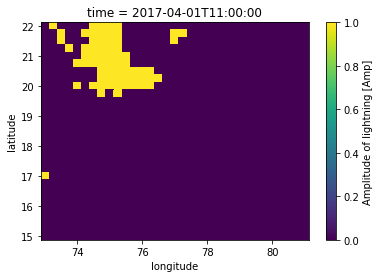

In [ ]:
plot2d = data_2017.Amplitude.isel(time=11
                                  )
plot2d.plot()

### Storing the dataset as a netcdf file.

In [ ]:
data_2017.to_netcdf('/content/drive/MyDrive/Lightning/data/pre-processed data/data2017.nc')